# Projeto de K Means Clustering  


Para este projeto, tentaremos usar o KMeans Clustering para agrupar Universidades em dois grupos: Privadas e Públicas.


___
É muito importante observar, nós realmente temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento KMeans, pois esse é um algoritmo de aprendizado não supervisionado.
___

## Os dados

Usaremos um quadro de dados com 777 observações sobre as 18 variáveis a seguir.
* Private: Um fator com níveis Não e Sim, indicando universidade privada ou pública.
* Apps: Número de inscrições recebidas.
* Accept: Quantidade de inscrições aceitas.
* Enroll: Número de estudantes matriculados.
* Top10perc: Percentual de novos estudantes vindo do grupo de 10% melhores do segundo grau.
* Top25perc: Percentual de novos estudantes vindo do grupo de 25% melhores do segundo grau.
* F.Undergrad: Número de alunos de graduação em tempo integral.
* P.Undergrad Número de alunos de graduação em tempo parcial.
* Outstate: Aulas fora do estado.
* Room.Board: Custos da sala.
* Books: Custos de livros estimados.
* Personal: Estimativa de gastos por pessoa.
* PhD: Percentual de PHD's na universidade.
* Terminal: Percentual da faculdade com graduação.
* S.F.Ratio: Taxa estudantes/faculdade.
* perc.alumni: Percentual dos ex-alunos que doam.
* Expend: Despesas da instituição por aluno.
* Grad.Rate: Taxa de graduação

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Obtendo os dados

In [6]:
df = pd.read_csv(r"C:\Users\herna\OneDrive\Python-Data-Science-and-Machine-Learning-Bootcamp\5. Machine Learning\K-Means-Clustering\College_Data", index_col=0)

In [7]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [9]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Análise exploratória de dados

C:\Users\herna\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


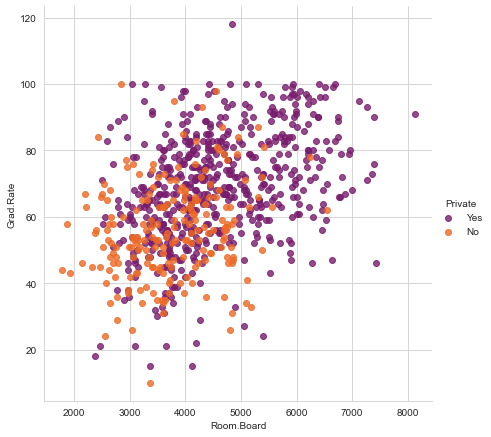

In [10]:
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=False, size=6, palette='inferno')

C:\Users\herna\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


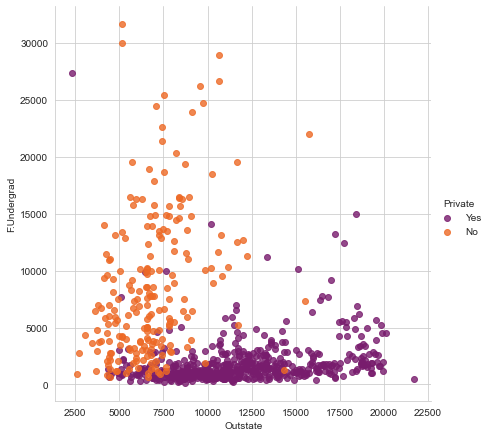

In [11]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private', fit_reg=False, size=6, palette='inferno')

C:\Users\herna\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


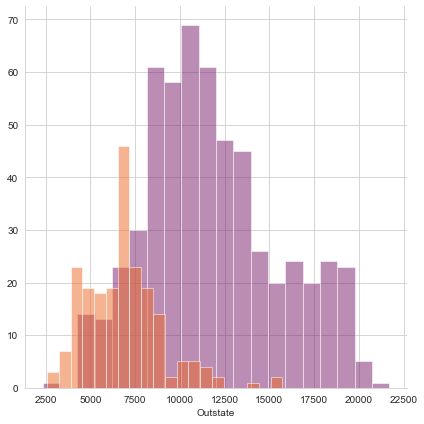

In [14]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', size=6, palette='inferno')
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.5)

C:\Users\herna\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


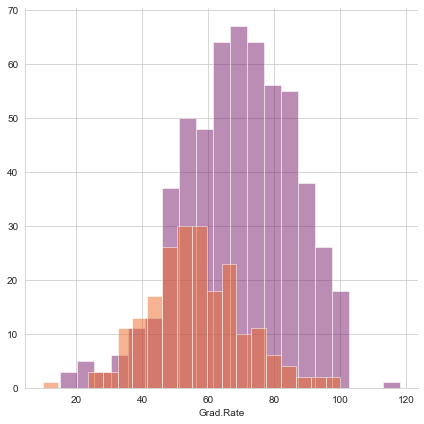

In [15]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', size=6, palette='inferno')
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.5)

In [16]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


#### Corrigindo a taxa de graduação da universidade para 100

In [20]:
df['Grad.Rate']['Cazenovia College']=100

<ipython-input-20-419a0d91f27a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College']=100


In [21]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


C:\Users\herna\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


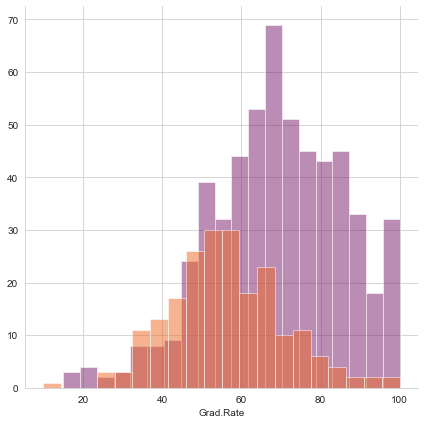

In [22]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', size=6, palette='inferno')
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.5)

## Criação do modelo de KMeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
kmeans.fit(df.drop('Private',inplace=False,axis=1))

KMeans(n_clusters=2)

## Avaliação

In [26]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [27]:
df['Cluster'] = df['Private'].apply(converter)

In [28]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(df['Cluster'],kmeans.labels_))
print('\n')
print(confusion_matrix(df['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



[[ 74 138]
 [ 34 531]]
